1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

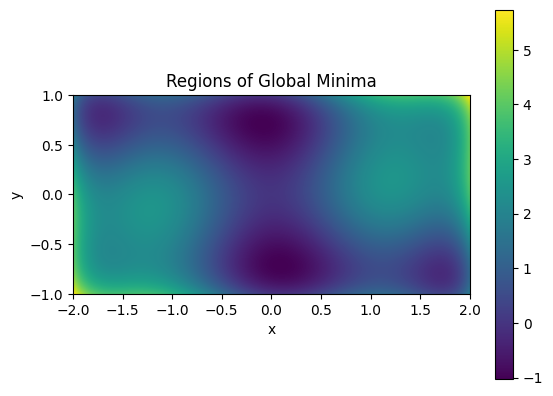

Global Minimum at (0.000, 0.000): 0.000
Global Minimum at (-0.090, 0.713): -1.032
Global Minimum at (0.090, -0.713): -1.032


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def f(x, y):
    return (4 - 2.1 * x**2 + x**4 / 3) * x**2 + x * y + (4 * y**2 - 4) * y**2

x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

plt.imshow(Z, extent=[-2, 2, -1, 1], origin='lower', cmap='viridis')
plt.colorbar()
plt.title("Regions of Global Minima")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

initial_guess = [(0, 0), (1, 1), (-1, -1)]  # Try different initial guesses

# Define the objective function to minimize
objective = lambda xy: f(xy[0], xy[1])

for guess in initial_guess:
    result = minimize(objective, guess, bounds=((-2, 2), (-1, 1)))
    print(f"Global Minimum at ({result.x[0]:.3f}, {result.x[1]:.3f}): {result.fun:.3f}")

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

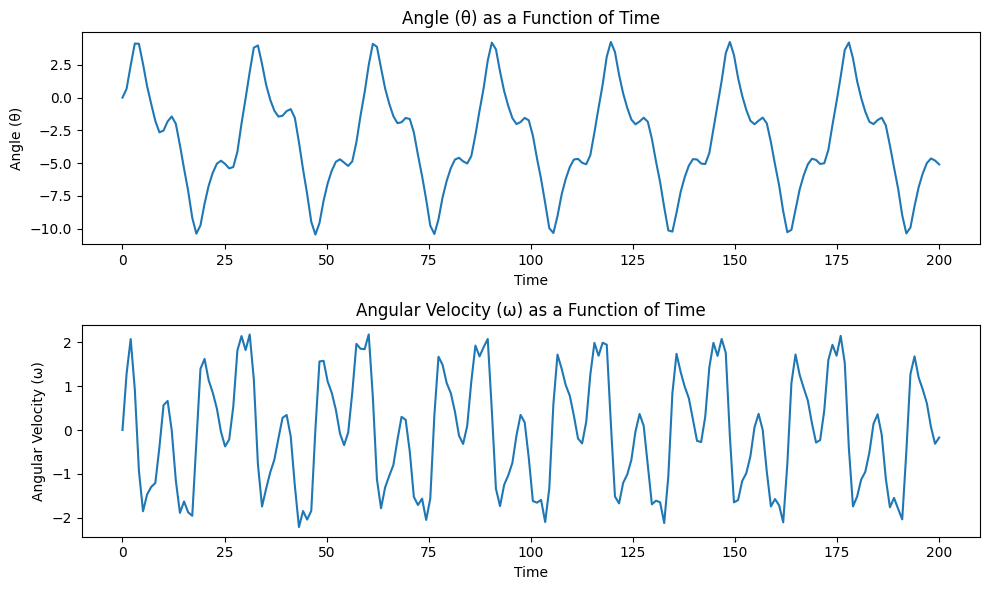

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the function that represents the system of first-order ODEs:
def pendulum(y, t, Q, d, g, l, Omega):
    theta, omega = y
    d_theta_dt = omega
    d_omega_dt = -(1/Q) * omega + (g/l) * np.sin(theta) + d * np.cos(Omega * t)
    return [d_theta_dt, d_omega_dt]

# Set the initial conditions and other parameters
theta_0 = 0
omega_0 = 0
l = 10
Q = 2.0
d = 1.5
g = 9.81
Omega = 0.65
initial_conditions = [theta_0, omega_0]

# Define the time points
t = np.linspace(0, 200, 200)

# Solve the ODE using `odeint`
solution = odeint(pendulum, initial_conditions, t, args=(Q, d, g, l, Omega))
theta = solution[:, 0]
omega = solution[:, 1]

# Finally, create two plots to visualize the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, theta)
plt.title("Angle (θ) as a Function of Time")
plt.xlabel("Time")
plt.ylabel("Angle (θ)")

plt.subplot(2, 1, 2)
plt.plot(t, omega)
plt.title("Angular Velocity (ω) as a Function of Time")
plt.xlabel("Time")
plt.ylabel("Angular Velocity (ω)")

plt.tight_layout()
plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [4]:
...

The period of the hare population is approximately 0.5 years.
The period of the lynx population is approximately 0.5 years.


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.